In [1]:
# Подключаем модули

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# считываем данные из csv файла с помощью pandas
df = pd.read_csv("Video_Games.csv", sep=",")

# выводим информацию о таблице
print(df.info())
display(df.describe())


# Приведем названия столбцов к нижнему регистру

print(df.columns)
columns = []
for c in df.columns:
    columns.append(c.lower())
df.columns = columns
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB
None


,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')
Index(['name', 'platform', 'year_of_release', 'genre', 'publisher', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'global_sales', 'critic_score',
       'critic_count', 'user_score', 'user_count', 'developer', 'rating'],
      dtype='object')


In [2]:
# Отобразим результат изменений
# Выведем только первые несколько строчек

df.head(2)

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Поменяем у стлобца год тип на целочисленный

df['year_of_release'] = df['year_of_release'].astype('Int64')
df['year_of_release'].dtype

Int64Dtype()

In [4]:
# Создадим столбец sales - сумма продаж во всех регионах 

df['sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head(2)

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating,sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E,82.54
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN,40.24


In [5]:
df

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating,sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E,82.54
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,0.01
16715,LMA Manager 2007,X360,2006,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,0.01
16716,Haitaka no Psychedelica,PSV,2016,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,0.01
16717,Spirits & Spells,GBA,2003,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,0.01


In [6]:
# Исследовательский анализ данных

# Сколько игр выпускалось в разные года.

time_release = df.groupby('year_of_release')['name'].count().reset_index()
time_release.columns = ['year', 'quantity']
time_release

,year,quantity
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


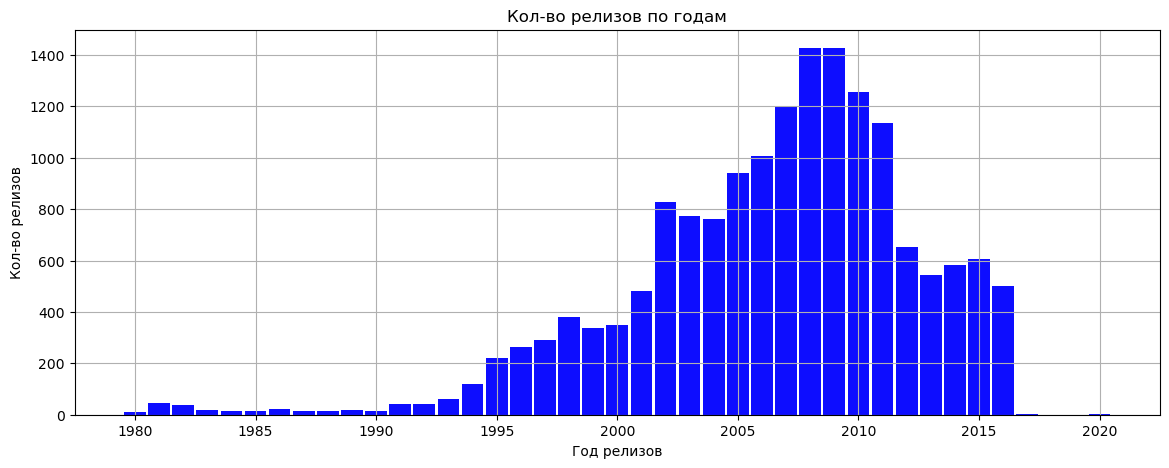

In [7]:
# Кол-во релизов по годам

plt.figure(figsize=(14, 5))
plt.bar(time_release['year'], time_release['quantity'], label='Кол-во релизов за год', color='b', alpha=0.95, width=0.9)
plt.xlabel('Год релизов')
plt.ylabel('Кол-во релизов')
plt.grid()
plt.title(f'Кол-во релизов по годам')
plt.show()

In [8]:
# Анализ продаж по платформам

plf = df.groupby('platform')['sales'].sum().sort_values().reset_index()
plf

,platform,sales
0,PCFX,0.03
1,GG,0.04
2,3DO,0.10
3,TG16,0.16
4,WS,1.42
5,NG,1.44
6,SCD,1.86
7,DC,15.95
8,GEN,30.77
9,SAT,33.59


In [9]:
# Возьмем 14 платформ с наибольшими объемами продаж. Построим по ним распределение продаж по годам
popul_platforms = plf.loc[17:30, 'platform'].values
popul_platforms

array(['NES', 'GB', 'XB', '3DS', 'PC', 'PSP', 'PS4', 'GBA', 'PS', 'DS',
       'Wii', 'PS3', 'X360', 'PS2'], dtype=object)

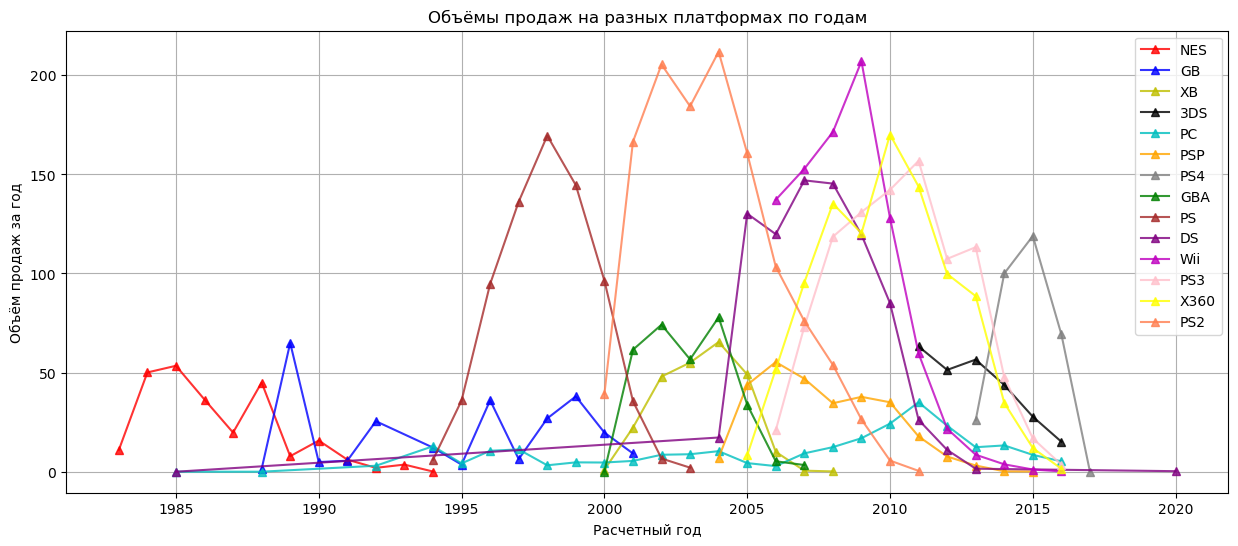

In [10]:
color = ['r','b','y','black','c','orange','grey','green','brown','purple','m','pink','yellow','coral','darkcyan','dimgray','lime']

plt.figure(figsize=(15, 6))
plt.grid()
plt.title('Объёмы продаж на разных платформах по годам')

mean_year_life = 0
for i in range(0,len(popul_platforms)):
    platform  = df.query('platform == @popul_platforms[@i]').groupby('year_of_release')['sales'].sum()
    mean_year_life += platform.count()
    platform.plot(x=platform.index, y=platform.values, style='-^', color=color[i],
                  label=popul_platforms[i], alpha=0.8, grid=True)
plt.xlabel('Расчетный год')    
plt.ylabel('Объём продаж за год')
plt.legend()
plt.show()

In [12]:
mean_year_life/len(popul_platforms)

11.357142857142858

In [13]:
platform2017 = df.pivot_table(index='year_of_release', columns='platform', values='sales', aggfunc='sum').\
    query('year_of_release>2004').fillna(0).reset_index()
platform2017['year_of_release'] = platform2017['year_of_release'].astype('Int64')

for column in platform2017.columns:
    if platform2017[column].sum()==0:
        platform2017.drop(column, axis=1,inplace=True)

display(platform2017)

ValueError: unknown type object

NameError: name 'platform2017' is not defined

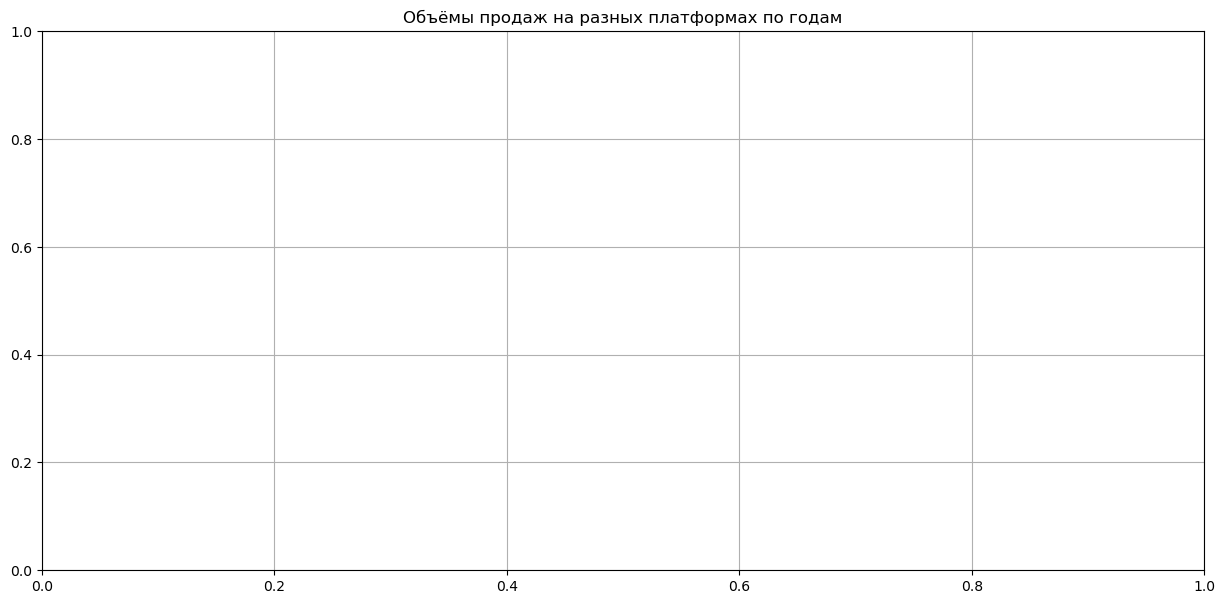

In [13]:
plt.figure(figsize=(15, 7))
plt.grid()
plt.title('Объёмы продаж на разных платформах по годам')

i=0
for column in platform2017.columns[1:]:
    plt.plot(platform2017['year_of_release'].to_list(), platform2017[column].to_list(), label=column, color=color[i], alpha=0.95);
    i+=1 

plt.grid()
plt.xlabel('Расчетный год')    
plt.ylabel('Объём продаж за год')
plt.legend()
plt.show()

In [13]:
top5_2017 = ['PS4', 'XOne', 'WiiU', 'PSV', '3DS']

top2005 = df.query('year_of_release>=2005').groupby('platform')['sales'].sum().sort_values(ascending=False).reset_index().head(10)
top2005

ValueError: unknown type object

In [14]:
top8 = top2005.head(8)
top8

NameError: name 'top2005' is not defined

In [15]:
genres = df.groupby('genre')['name'].count().sort_values(ascending=False)
genres

genre
Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
Name: name, dtype: int64

In [16]:
genre_sales = df.groupby('genre')['sales'].sum().sort_values(ascending=False)
genre_sales

genre
Action          1744.18
Sports          1331.27
Shooter         1052.45
Role-Playing     934.61
Platform         827.77
Misc             802.51
Racing           728.67
Fighting         447.53
Simulation       390.26
Puzzle           242.57
Adventure        237.59
Strategy         174.23
Name: sales, dtype: float64

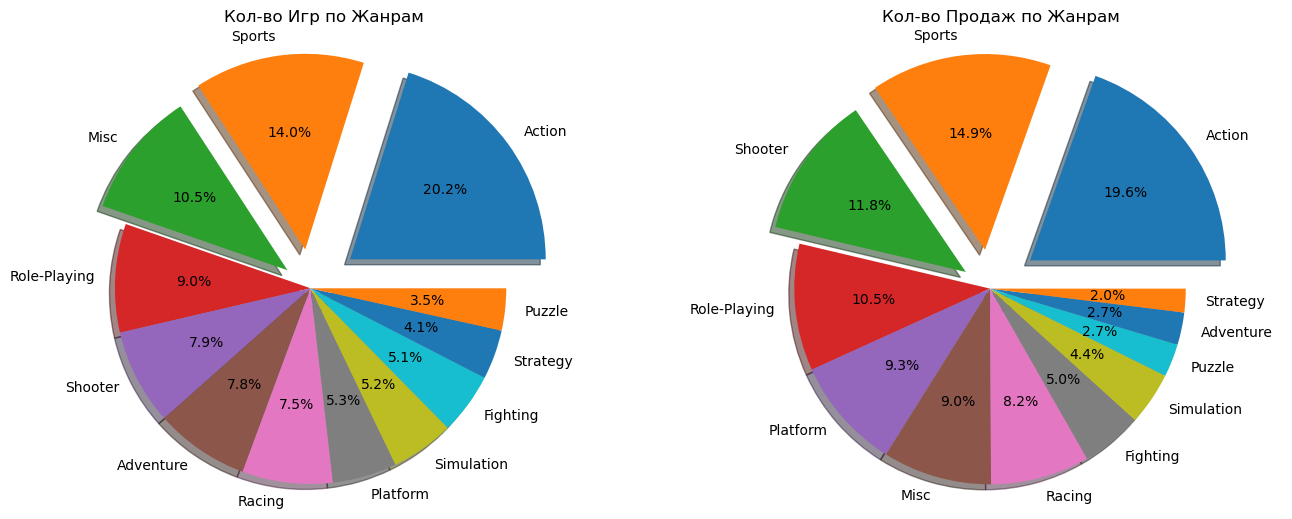

In [17]:
# Графики
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 7))
fig.autofmt_xdate()

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels1 = genres.index
sizes1 = genres.values

labels2 = genre_sales.index
sizes2 = genre_sales.values
explode = (0.25, 0.2, 0.15, 0,0,0,0,0,0,0,0,0)
ax1.set_title('Кол-во Игр по Жанрам')
ax1.pie(sizes1, labels=labels1, autopct='%1.1f%%',
        shadow=True, explode=explode,startangle=0)  
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax2.set_title('Кол-во Продаж по Жанрам')
ax2.pie(sizes2, labels=labels2, autopct='%1.1f%%',
        shadow=True, explode=explode,startangle=0) 
ax2.axis('equal')

plt.show()

In [18]:
popul_5genre_dict = {}
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    popul_5genre_dict[region] = df.groupby('genre')[region].sum().sort_values(ascending=False).head(5)
popul_5genre_dict

{'na_sales': genre
 Action      879.01
 Sports      684.43
 Shooter     592.24
 Platform    445.50
 Misc        407.27
 Name: na_sales, dtype: float64,
 'eu_sales': genre
 Action     519.13
 Sports     376.79
 Shooter    317.34
 Racing     236.51
 Misc       212.74
 Name: eu_sales, dtype: float64,
 'jp_sales': genre
 Role-Playing    355.46
 Action          161.44
 Sports          135.54
 Platform        130.83
 Misc            108.11
 Name: jp_sales, dtype: float64}

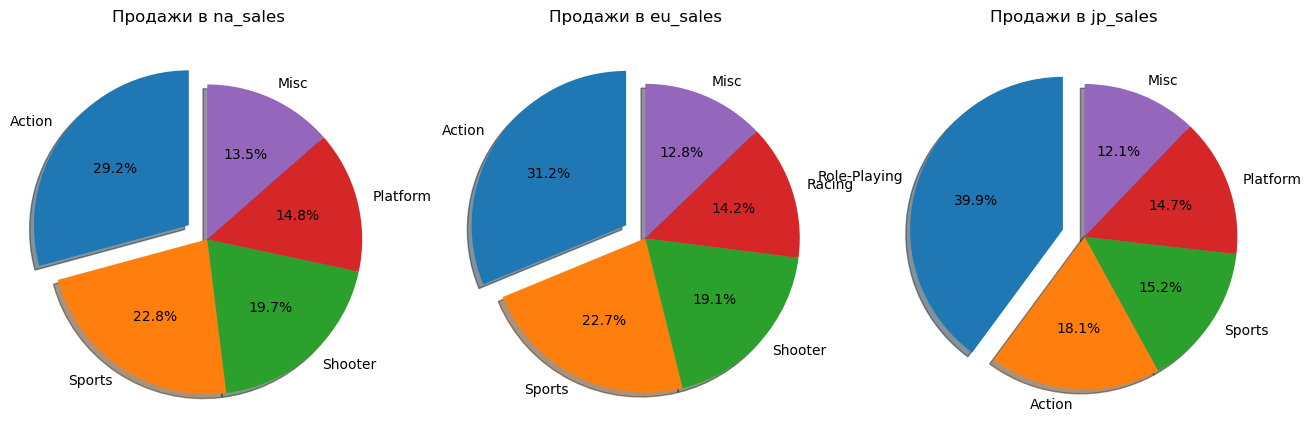

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))
fig.autofmt_xdate()

i = 0
x = [ax1, ax2, ax3]
region = ['na_sales', 'eu_sales', 'jp_sales']
explode = (0.15, 0, 0, 0, 0)

for i in [0,1,2]:
    labels = popul_5genre_dict[region[i]].index
    sizes = popul_5genre_dict[region[i]].values
    ax = x[i]
    ax.set_title(f'Продажи в {region[i]}')
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode,startangle=90) 
    ax.axis('equal')  

plt.show()